In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [45]:
## read data
data = pd.read_csv("data/Social_Network_Ads.csv")

In [46]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [47]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

# 1. Reformat data

In [48]:
lbl = LabelEncoder()
data["Gender"] = lbl.fit_transform(data['Gender'])

In [7]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [49]:
from sklearn.model_selection import train_test_split

# 2. Train test split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,0:4],data.iloc[:,-1],test_size=0.3,random_state=422)

In [54]:
X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]

In [36]:
X_test

,Gender,Age,EstimatedSalary
209,0,46,22000
280,0,59,88000
33,0,28,44000
210,0,48,96000
93,0,29,28000
...,...,...,...
60,1,27,20000
79,0,26,17000
285,0,37,93000
305,1,42,54000


# 3. Modeling

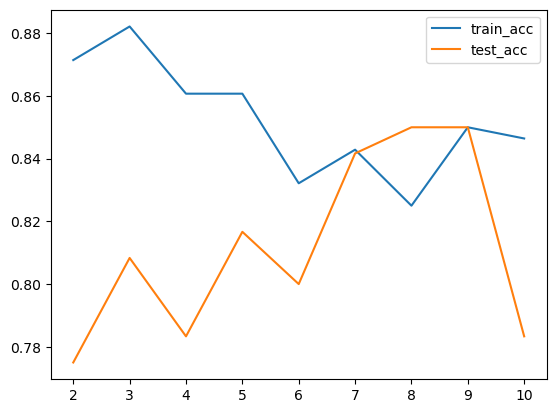

In [55]:
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
test_acc = []
for k in range(2,11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    tr_ac = neigh.score(X_train,y_train)
    te_ac = neigh.score(X_test,y_test)
    train_acc.append(tr_ac)
    test_acc.append(te_ac)

# plot accuracy to select k
from matplotlib import pyplot as plt
X_label = list(range(2,11))
plt.plot(X_label,train_acc,label='train_acc')
plt.plot(X_label,test_acc,label='test_acc')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import classification_report

In [56]:
fk=7
neigh = KNeighborsClassifier(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(classification_report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.8118    0.9583    0.8790        72
           1     0.9143    0.6667    0.7711        48

    accuracy                         0.8417       120
   macro avg     0.8630    0.8125    0.8250       120
weighted avg     0.8528    0.8417    0.8358       120

